In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd

In [5]:
def batch_preprocess_texts(
    texts,
    nlp=None,
    remove_stopwords=True,
    remove_punct=True,
    use_lemmas=False,
    disable=["ner"],
    batch_size=50,
    n_process=-1,
):
    """Efficiently preprocess a collection of texts using nlp.pipe()

    Args:
        texts (collection of strings): collection of texts to process (e.g. df['text'])
        nlp (spacy pipe), optional): Spacy nlp pipe. Defaults to None; if None, it creates a default 'en_core_web_sm' pipe.
        remove_stopwords (bool, optional): Controls stopword removal. Defaults to True.
        remove_punct (bool, optional): Controls punctuation removal. Defaults to True.
        use_lemmas (bool, optional): lemmatize tokens. Defaults to False.
        disable (list of strings, optional): named pipeline elements to disable. Defaults to ["ner"]: Used with nlp.pipe(disable=disable)
        batch_size (int, optional): Number of texts to process in a batch. Defaults to 50.
        n_process (int, optional): Number of CPU processors to use. Defaults to -1 (meaning all CPU cores).

    Returns:
        list of tokens
    """
    # from tqdm.notebook import tqdm
    from tqdm import tqdm

    if nlp is None:
        nlp = spacy.load("en_core_web_sm")

    processed_texts = []

    for doc in tqdm(nlp.pipe(texts, disable=disable, batch_size=batch_size, n_process=n_process)):
        tokens = []
        for token in doc:
            # Check if should remove stopwords and if token is stopword
            if (remove_stopwords == True) and (token.is_stop == True):
                # Continue the loop with the next token
                continue

            # Check if should remove punctuation and if token is punctuation
            if (remove_punct == True) and (token.is_punct == True):
                continue

            # Check if should remove whitespace and if token is whitespace
            if (remove_punct == True) and (token.is_space == True):
                continue

            # Determine final form of output list of tokens/lemmas
            if use_lemmas:
                tokens.append(token.lemma_.lower())
            else:
                tokens.append(token.text.lower())

        processed_texts.append(tokens)
    return processed_texts

In [6]:
# Load data
df_businesses = pd.read_csv("/content/yelp-business-metadata.csv", index_col='business_id')
df_businesses.head()

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories
business_id,,,,,,,,,,
Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7.0,"Doctors, Traditional Chinese Medicine, Naturop..."
mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15.0,"Shipping Centers, Local Services, Notaries, Ma..."
tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22.0,"Department Stores, Shopping, Fashion, Home & G..."
MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13.0,"Brewpubs, Breweries, Food"


In [7]:
# Load in the reviews for CA 2015-2018
df = pd.read_csv('/content/yelp-reviews-CA-2015-2018.csv.gz', index_col='review_id')
df.head()

,business_id,date,text,stars,language
review_id,,,,,
8W3g9ykr8aGGZMMdVbNPKA,gGaF0TtGRx1QOFe0EzuZLg,2015-01-01 00:01:02,Lynn and Montecito flowers are simply the best...,5,en
q10HcbeBRtcvsN7WC02fFw,2CqQ3Tnvj7h0rw84WEEjMw,2015-01-01 00:15:12,Love this place! Always loved the food as they...,5,en
dXOY5UqXhcCQ6f9S-kRc2w,lOa1BVmTcbPpu05h3OPAQA,2015-01-01 00:19:36,We stayed here last weekend with our dog. Its ...,5,en
8mWVoTXecEkRXTvPONYFuw,QFh-h_OZ5Io-mBk32HN28A,2015-01-01 00:20:23,Came here for a quick bite and got the thai sa...,2,en
Xr5KEchLr-jvQiAZm1mtNA,cAbdvzqtFLaAAMFIyPf2AA,2015-01-01 00:47:19,Finally was able to try lunch at Holdren's. M...,2,en


In [8]:
# New pandas option to change:
pd.get_option('display.max_colwidth')

50

In [9]:
# Increase column width
pd.set_option('display.max_colwidth', 250)
df.head()

,business_id,date,text,stars,language
review_id,,,,,
8W3g9ykr8aGGZMMdVbNPKA,gGaF0TtGRx1QOFe0EzuZLg,2015-01-01 00:01:02,"Lynn and Montecito flowers are simply the best. Awesome choices, friendly service and great pricing.",5,en
q10HcbeBRtcvsN7WC02fFw,2CqQ3Tnvj7h0rw84WEEjMw,2015-01-01 00:15:12,"Love this place! Always loved the food as they truly due have Killer BBQ. From pulled pork sandwiches to tri-tip the food is always a win. Now with the new location with the huge dog friendly patio, I think I just found my new favorite spot to wa...",5,en
dXOY5UqXhcCQ6f9S-kRc2w,lOa1BVmTcbPpu05h3OPAQA,2015-01-01 00:19:36,We stayed here last weekend with our dog. Its a motel style but the inside is a four star hotel. No kidding! The fireplace adds a nice touch. One block from the beach. Front desk is really nice. Could not ask for a better location. Of course this...,5,en
8mWVoTXecEkRXTvPONYFuw,QFh-h_OZ5Io-mBk32HN28A,2015-01-01 00:20:23,Came here for a quick bite and got the thai salad and a bowl of white bean chicken soup. The salad was pretty basic and the soup was lukewarm. We went around noon and most of the tables had dirty dishes from the previous customers. I asked one o...,2,en
Xr5KEchLr-jvQiAZm1mtNA,cAbdvzqtFLaAAMFIyPf2AA,2015-01-01 00:47:19,"Finally was able to try lunch at Holdren's. My husband ordered the Kobe Burger (medium), and I ordered the Pastrami Melt/Caesar salad. The $18 Kobe Burger came to the table overcooked (well), and very dry. Fries weren't hot or crispy. On top o...",2,en


In [10]:
# Filter using city
filter_city = df_businesses['city'].str.contains('Santa Barbara')
filter_city.sum()

1990

In [11]:
# Filter using name
filter_name =  df_businesses['name'].str.contains("Sandbar")
filter_name.sum()

3

In [12]:
# Find the target business
selected_business =df_businesses.loc[ filter_name & filter_city]
selected_business

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories
business_id,,,,,,,,,,
EtM079Cj7-B3G7jPsGYb_Q,Sandbar,514 State St,Santa Barbara,CA,93101,34.417371,-119.695827,3.5,1546.0,"Nightlife, Arts & Entertainment, Restaurants, Dance Clubs, Bars, Music Venues, Mexican, Sports Bars"


In [13]:
# Save the business id for slicing the reviews
business_id = selected_business.index[0]
business_id

'EtM079Cj7-B3G7jPsGYb_Q'

In [14]:
# Keep reviews for the selected business
reviews = df.loc[ df['business_id']==business_id]
reviews

,business_id,date,text,stars,language
review_id,,,,,
laTog6hwC5yAIWemC_jHfA,EtM079Cj7-B3G7jPsGYb_Q,2015-01-31 12:15:07,Awesome Mexican spot! The outdoor patio at night is live and full of action. Good music and great lighting with plenty of people having a great time. I do not remember what we ordered here because it was a few months ago but it was good and I kno...,4,en
78BMrY9uWMnqo34zYj9B6g,EtM079Cj7-B3G7jPsGYb_Q,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,en
DwVApGXXWAPBVCO6LtMG8Q,EtM079Cj7-B3G7jPsGYb_Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5,en
J64FTyafTlA5Ct4LwHYg2g,EtM079Cj7-B3G7jPsGYb_Q,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1,en
ey05cLREtcvj2dxtJFWeFw,EtM079Cj7-B3G7jPsGYb_Q,2015-02-28 21:05:22,Not bad for the price or location. The sauces weren't that good or flavorful. My friend got the mole and it looked pretty awful. She actually scraped the sauce off. They did have a decent selection of vegetarian options though.,3,en
...,...,...,...,...,...
Y2fAC-48ze0q5P-uMbTbEg,EtM079Cj7-B3G7jPsGYb_Q,2018-12-25 22:04:08,"Hands down the best steak fajitas this native Angelena has ever had. Fun vibe, cozy, and delicious salsa. Would love to come back for happy hour next time I'm in Santa Barbara!",5,en
1n_mhEnQNnnGdYJvPJgXhw,EtM079Cj7-B3G7jPsGYb_Q,2018-12-27 01:58:23,"Came here on Christmas Day (thank god they were open). Ordered the Carne Asada and Grilled Relleno . The steak was over cooked (outer pieces), but taste decent, chili with cheese was okay, and portion was small. \n\nThe service was super duper sl...",3,en
LJcDXfNjLYsMEa99z6A_QQ,EtM079Cj7-B3G7jPsGYb_Q,2018-12-29 01:54:25,Happy hour menu and prices are great! Service is awesome. Allows small dogs. Food portions are pretty big. Left stuffed and happy.,5,en


In [15]:
# View a sample review
sample_review = reviews.iloc[0]
sample_review['text']

'Awesome Mexican spot! The outdoor patio at night is live and full of action. Good music and great lighting with plenty of people having a great time. I do not remember what we ordered here because it was a few months ago but it was good and I know we would go back next time we are in town!'

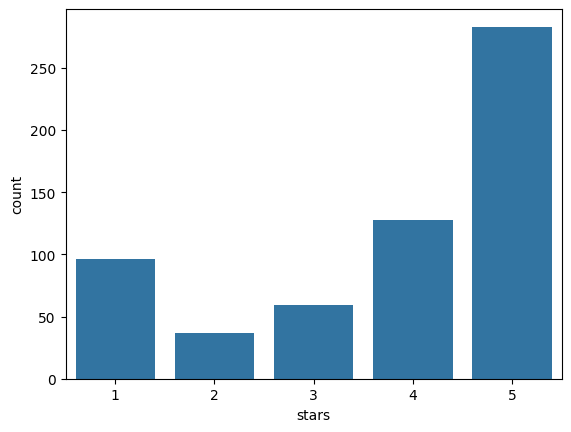

In [16]:
# Defining Groups

# How many of each star rating?
sns.countplot(data = reviews, x = 'stars');

In [17]:
# Limit data to only 1 and 5 star reviews
reviews = reviews[reviews['stars'].isin([1,5])]
reviews

,business_id,date,text,stars,language
review_id,,,,,
78BMrY9uWMnqo34zYj9B6g,EtM079Cj7-B3G7jPsGYb_Q,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,en
DwVApGXXWAPBVCO6LtMG8Q,EtM079Cj7-B3G7jPsGYb_Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5,en
J64FTyafTlA5Ct4LwHYg2g,EtM079Cj7-B3G7jPsGYb_Q,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1,en
5LtZZGB1dCHZswuEu7PFwQ,EtM079Cj7-B3G7jPsGYb_Q,2015-02-28 23:47:01,"Best Mexican grill and bar in Santa Barbara. Our server Lillian was the very best, Will definitely come again. Already planning breakfast tomorrow morning!",5,en
VPWNyhR3DeNfu8cmzPU7HQ,EtM079Cj7-B3G7jPsGYb_Q,2015-03-15 19:55:55,This has to be the worse service. Got seated right away and then sat and waited. No one even acknowledged we were here for a good 15 min. Then another couple was seated near us. They got asked for drinks and food order before we were even acknowl...,1,en
...,...,...,...,...,...
IgCV2QnCQdheaTM8e9Un3w,EtM079Cj7-B3G7jPsGYb_Q,2018-12-18 03:07:20,"Went on 12/13/18 with a group of friends and ordered ""the nachos"". Once we got the nachos mid way through we found about 3 pieces of paper which looked like straw covers. Manager has no empathy to this situation. Absolutely unnecessary and disgus...",1,en
f4xpggDD1X2AQdaG2eqGiw,EtM079Cj7-B3G7jPsGYb_Q,2018-12-24 22:28:57,"This is a really cool place. Santa Barbara has a bunch of nice places to eat and I can definitely recommend that this place is one of them. Our server was super cool, very easy to talk to and took care of everything we ordered. It also was pretty...",5,en
Y2fAC-48ze0q5P-uMbTbEg,EtM079Cj7-B3G7jPsGYb_Q,2018-12-25 22:04:08,"Hands down the best steak fajitas this native Angelena has ever had. Fun vibe, cozy, and delicious salsa. Would love to come back for happy hour next time I'm in Santa Barbara!",5,en


In [18]:
# What languages are represented?
reviews['language'].value_counts()

language
en    378
de      1
Name: count, dtype: int64

In [19]:
# Limit data to only English
reviews = reviews[reviews['language']=='en']
reviews['language'].value_counts()

language
en    378
Name: count, dtype: int64

In [20]:
# How many 1 and 5 star reviews?
reviews['stars'].value_counts()

stars
5    282
1     96
Name: count, dtype: int64

In [21]:
# Drop business_id and language
reviews = reviews.drop(columns=['business_id', 'language'])
# Make data a datetime object
reviews['date'] = pd.to_datetime(reviews['date'])
reviews.head()

,date,text,stars
review_id,,,
78BMrY9uWMnqo34zYj9B6g,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5
DwVApGXXWAPBVCO6LtMG8Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5
J64FTyafTlA5Ct4LwHYg2g,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1
5LtZZGB1dCHZswuEu7PFwQ,2015-02-28 23:47:01,"Best Mexican grill and bar in Santa Barbara. Our server Lillian was the very best, Will definitely come again. Already planning breakfast tomorrow morning!",5
VPWNyhR3DeNfu8cmzPU7HQ,2015-03-15 19:55:55,This has to be the worse service. Got seated right away and then sat and waited. No one even acknowledged we were here for a good 15 min. Then another couple was seated near us. They got asked for drinks and food order before we were even acknowl...,1


In [22]:
# Preprocessing Pipeline

import spacy
# Disable parser and ner
nlp_light = spacy.load("en_core_web_sm", disable=['parser','ner'])
# Print active components
nlp_light.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

In [23]:
# batch preprocess the text and store tokens
reviews['tokens'] = batch_preprocess_texts(reviews['text'], nlp = nlp_light)
reviews.head()

378it [00:05, 66.74it/s] 


,date,text,stars,tokens
review_id,,,,
78BMrY9uWMnqo34zYj9B6g,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,"[randomly, popped, sandbar, spending, morning, shopping, santa, barbara, completely, blown, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, ordered, tacos, happier, ordered, grilled, veggie, tacos, s..."
DwVApGXXWAPBVCO6LtMG8Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5,"[place, turned, years, noticed, bad, review, 2009, felt, update, place, run, completely, differently, food, excellent, staff, courteous]"
J64FTyafTlA5Ct4LwHYg2g,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1,"[pretty, disappointed, went, opening, night, remodel, good, time, went, night, group, friends, state, id, believe, santa, barbara, tourist, town, going, years, issue, az, id, gave, credit, card, california, sales, license, work, license, good, 25..."
5LtZZGB1dCHZswuEu7PFwQ,2015-02-28 23:47:01,"Best Mexican grill and bar in Santa Barbara. Our server Lillian was the very best, Will definitely come again. Already planning breakfast tomorrow morning!",5,"[best, mexican, grill, bar, santa, barbara, server, lillian, best, definitely, come, planning, breakfast, tomorrow, morning]"
VPWNyhR3DeNfu8cmzPU7HQ,2015-03-15 19:55:55,This has to be the worse service. Got seated right away and then sat and waited. No one even acknowledged we were here for a good 15 min. Then another couple was seated near us. They got asked for drinks and food order before we were even acknowl...,1,"[worse, service, got, seated, right, away, sat, waited, acknowledged, good, 15, min, couple, seated, near, got, asked, drinks, food, order, acknowledged, finally, waiter, came, took, order, left, got, chips, finished, waiter, asked, wanted, said,..."


In [24]:
# batch preprocess the text and store lemmas
reviews['lemmas'] = batch_preprocess_texts(reviews['text'], nlp = nlp_light, use_lemmas = True)
reviews.head()

378it [00:03, 97.28it/s] 


,date,text,stars,tokens,lemmas
review_id,,,,,
78BMrY9uWMnqo34zYj9B6g,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,"[randomly, popped, sandbar, spending, morning, shopping, santa, barbara, completely, blown, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, ordered, tacos, happier, ordered, grilled, veggie, tacos, s...","[randomly, pop, sandbar, spend, morning, shopping, santa, barbara, completely, blow, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, order, taco, happy, order, grill, veggie, tacos, spice, cool, ques..."
DwVApGXXWAPBVCO6LtMG8Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5,"[place, turned, years, noticed, bad, review, 2009, felt, update, place, run, completely, differently, food, excellent, staff, courteous]","[place, turn, year, notice, bad, review, 2009, feel, update, place, run, completely, differently, food, excellent, staff, courteous]"
J64FTyafTlA5Ct4LwHYg2g,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1,"[pretty, disappointed, went, opening, night, remodel, good, time, went, night, group, friends, state, id, believe, santa, barbara, tourist, town, going, years, issue, az, id, gave, credit, card, california, sales, license, work, license, good, 25...","[pretty, disappointed, go, opening, night, remodel, good, time, go, night, group, friend, state, id, believe, santa, barbara, tourist, town, go, year, issue, az, id, give, credit, card, california, sale, license, work, license, good, 25yr, old, r..."
5LtZZGB1dCHZswuEu7PFwQ,2015-02-28 23:47:01,"Best Mexican grill and bar in Santa Barbara. Our server Lillian was the very best, Will definitely come again. Already planning breakfast tomorrow morning!",5,"[best, mexican, grill, bar, santa, barbara, server, lillian, best, definitely, come, planning, breakfast, tomorrow, morning]","[well, mexican, grill, bar, santa, barbara, server, lillian, good, definitely, come, plan, breakfast, tomorrow, morning]"
VPWNyhR3DeNfu8cmzPU7HQ,2015-03-15 19:55:55,This has to be the worse service. Got seated right away and then sat and waited. No one even acknowledged we were here for a good 15 min. Then another couple was seated near us. They got asked for drinks and food order before we were even acknowl...,1,"[worse, service, got, seated, right, away, sat, waited, acknowledged, good, 15, min, couple, seated, near, got, asked, drinks, food, order, acknowledged, finally, waiter, came, took, order, left, got, chips, finished, waiter, asked, wanted, said,...","[bad, service, got, seat, right, away, sit, wait, acknowledge, good, 15, min, couple, seat, near, get, ask, drink, food, order, acknowledge, finally, waiter, come, take, order, leave, get, chip, finish, waiter, ask, want, say, yes, get, chip, wai..."


In [25]:
# View a sample of tokens
sample_review = reviews.iloc[0]
sample_review['tokens']

['randomly',
 'popped',
 'sandbar',
 'spending',
 'morning',
 'shopping',
 'santa',
 'barbara',
 'completely',
 'blown',
 'away',
 'let',
 'start',
 'staff',
 'person',
 'contact',
 'happy',
 'engaging',
 'friendly',
 'great',
 'start',
 'experience',
 'ordered',
 'tacos',
 'happier',
 'ordered',
 'grilled',
 'veggie',
 'tacos',
 'spice',
 'cooled',
 'queso',
 'fresco',
 'hubby',
 'ordered',
 'chicken',
 'tacos',
 'spicy',
 'veggie',
 'ones',
 'spicy',
 'inhaled',
 'sets',
 'tacos',
 'elevated',
 'level',
 'homemade',
 'tortillas',
 'simply',
 'delicious',
 'authentic']

In [26]:
# confirm data type of tokens
type(sample_review['tokens'])

list

In [27]:
# confirm data type of lemmas
type(sample_review['lemmas'])

list

In [28]:
# Join list of tokens into a string with spaces between each token
reviews['tokens-joined'] = reviews['tokens'].map(lambda x: " ".join(x))
# Join list of lemmas into a string with spaces between each lemma
reviews['lemmas-joined'] = reviews['lemmas'].map(lambda x: " ".join(x))
reviews.head(3)

,date,text,stars,tokens,lemmas,tokens-joined,lemmas-joined
review_id,,,,,,,
78BMrY9uWMnqo34zYj9B6g,2015-02-27 04:10:53,"We randomly popped into the Sandbar after spending the morning shopping in Santa Barbara and we were completely blown away! Let's start with the staff - each person with whom we had contact was happy to be there, engaging, and friendly. What a ...",5,"[randomly, popped, sandbar, spending, morning, shopping, santa, barbara, completely, blown, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, ordered, tacos, happier, ordered, grilled, veggie, tacos, s...","[randomly, pop, sandbar, spend, morning, shopping, santa, barbara, completely, blow, away, let, start, staff, person, contact, happy, engaging, friendly, great, start, experience, order, taco, happy, order, grill, veggie, tacos, spice, cool, ques...",randomly popped sandbar spending morning shopping santa barbara completely blown away let start staff person contact happy engaging friendly great start experience ordered tacos happier ordered grilled veggie tacos spice cooled queso fresco hubby...,randomly pop sandbar spend morning shopping santa barbara completely blow away let start staff person contact happy engaging friendly great start experience order taco happy order grill veggie tacos spice cool queso fresco hubby order chicken tac...
DwVApGXXWAPBVCO6LtMG8Q,2015-02-27 20:31:45,This place has really turned itself around over the years. I just noticed my bad review from 2009 and felt I should update now that the place is run completely differently. The food is now excellent and the staff courteous.,5,"[place, turned, years, noticed, bad, review, 2009, felt, update, place, run, completely, differently, food, excellent, staff, courteous]","[place, turn, year, notice, bad, review, 2009, feel, update, place, run, completely, differently, food, excellent, staff, courteous]",place turned years noticed bad review 2009 felt update place run completely differently food excellent staff courteous,place turn year notice bad review 2009 feel update place run completely differently food excellent staff courteous
J64FTyafTlA5Ct4LwHYg2g,2015-02-28 04:28:55,"Was pretty disappointed. Went on the opening night of there remodel, had a good time. Then went back the next night with a group of friends. They would not except my out of state ID can you believe that!! In Santa Barbara a ""tourist town"". I Had ...",1,"[pretty, disappointed, went, opening, night, remodel, good, time, went, night, group, friends, state, id, believe, santa, barbara, tourist, town, going, years, issue, az, id, gave, credit, card, california, sales, license, work, license, good, 25...","[pretty, disappointed, go, opening, night, remodel, good, time, go, night, group, friend, state, id, believe, santa, barbara, tourist, town, go, year, issue, az, id, give, credit, card, california, sale, license, work, license, good, 25yr, old, r...",pretty disappointed went opening night remodel good time went night group friends state id believe santa barbara tourist town going years issue az id gave credit card california sales license work license good 25yrs old rejected id lady asked pas...,pretty disappointed go opening night remodel good time go night group friend state id believe santa barbara tourist town go year issue az id give credit card california sale license work license good 25yr old reject id lady ask passport american ...


In [29]:
# Define first review as sample
sample_review = reviews.iloc[0]
# confirm data type of tokens-joined
print(type(sample_review['tokens-joined']))
# confirm data type of lemmas-joined
print(type(sample_review['lemmas-joined']))

<class 'str'>
<class 'str'>


In [30]:
# Preview the tokens-joined into a single string
sample_review['tokens-joined']

'randomly popped sandbar spending morning shopping santa barbara completely blown away let start staff person contact happy engaging friendly great start experience ordered tacos happier ordered grilled veggie tacos spice cooled queso fresco hubby ordered chicken tacos spicy veggie ones spicy inhaled sets tacos elevated level homemade tortillas simply delicious authentic'